# Handling Embalaced Dataset

### Explorez le dataset : business understanding, features...

In [5]:
import pandas as pd
import numpy as np

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df= pd.read_csv(('/kaggle/input/stroke-event/stroke_event.csv'), sep=',', header=0)

/kaggle/input/stroke-event/stroke_event.csv


In [6]:
# print the first 5 rows of the dataframe
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [7]:
# Basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB
None


In [8]:
# Basic statistical summary
print(df.describe())

                 id           age  hypertension  heart_disease  \
count  43400.000000  43400.000000  43400.000000   43400.000000   
mean   36326.142350     42.217894      0.093571       0.047512   
std    21072.134879     22.519649      0.291235       0.212733   
min        1.000000      0.080000      0.000000       0.000000   
25%    18038.500000     24.000000      0.000000       0.000000   
50%    36351.500000     44.000000      0.000000       0.000000   
75%    54514.250000     60.000000      0.000000       0.000000   
max    72943.000000     82.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       43400.000000  41938.000000  43400.000000  
mean          104.482750     28.605038      0.018041  
std            43.111751      7.770020      0.133103  
min            55.000000     10.100000      0.000000  
25%            77.540000     23.200000      0.000000  
50%            91.580000     27.700000      0.000000  
75%           112.07

In [9]:
# Shape of the dataframe
df.shape

(43400, 12)

In [10]:
df['stroke'].value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

In [11]:
df['Residence_type'].value_counts()

Residence_type
Urban    21756
Rural    21644
Name: count, dtype: int64

In [12]:
df['work_type'].value_counts()

work_type
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: count, dtype: int64

In [13]:
df['smoking_status'].value_counts()

smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

In [14]:
df['age'].value_counts()

age
51.00    738
52.00    721
53.00    701
78.00    698
50.00    694
        ... 
0.48      37
0.40      35
1.00      34
0.16      26
0.08      17
Name: count, Length: 104, dtype: int64

# Data Visualisation

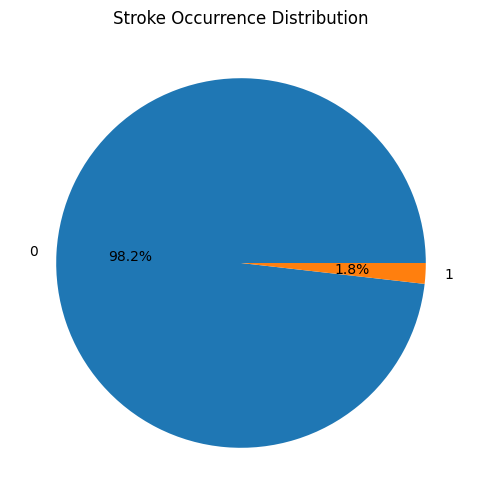

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stroke Distribution
plt.figure(figsize=(8,6))
df['stroke'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Stroke Occurrence Distribution')
plt.ylabel('')
plt.show()

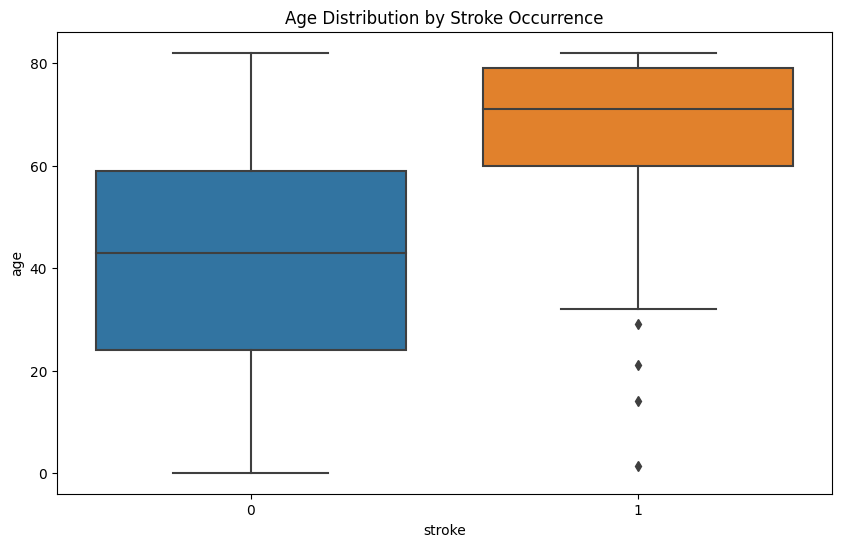

In [16]:
# Age and Stroke Relationship
plt.figure(figsize=(10,6))
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Age Distribution by Stroke Occurrence')
plt.show()

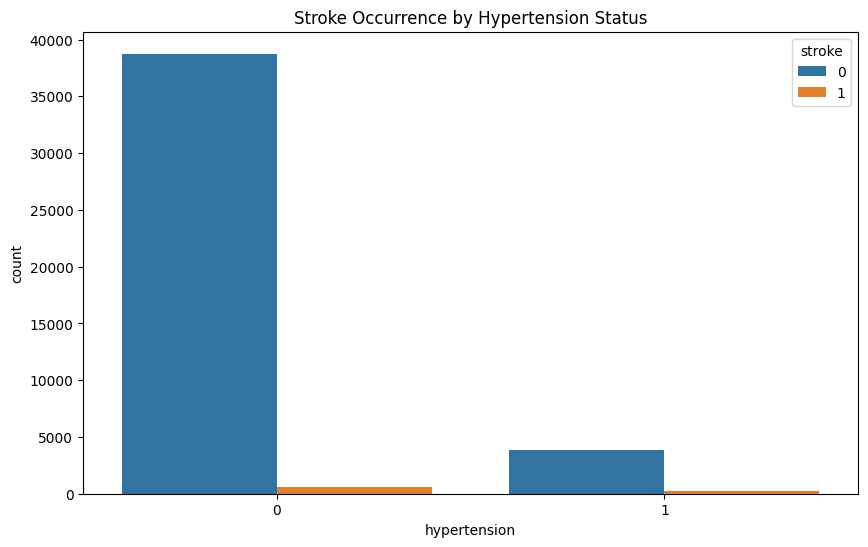

In [17]:
# Hypertension and Stroke Relationship
plt.figure(figsize=(10,6))
sns.countplot(x='hypertension', hue='stroke', data=df)
plt.title('Stroke Occurrence by Hypertension Status')
plt.show()

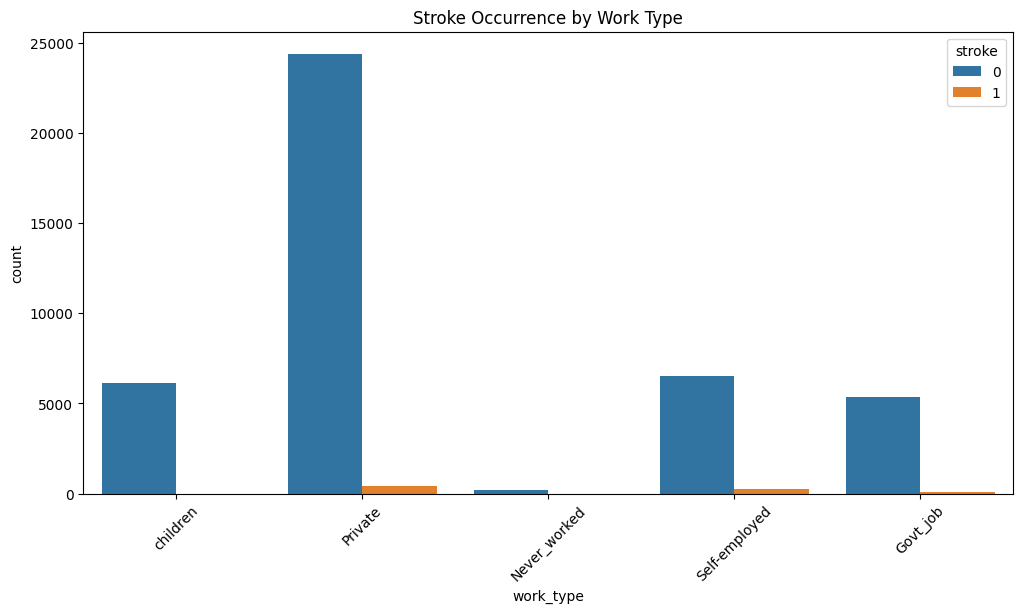

In [18]:
# Work Type and Stroke Relationship
plt.figure(figsize=(12,6))
sns.countplot(x='work_type', hue='stroke', data=df)
plt.title('Stroke Occurrence by Work Type')
plt.xticks(rotation=45)
plt.show()

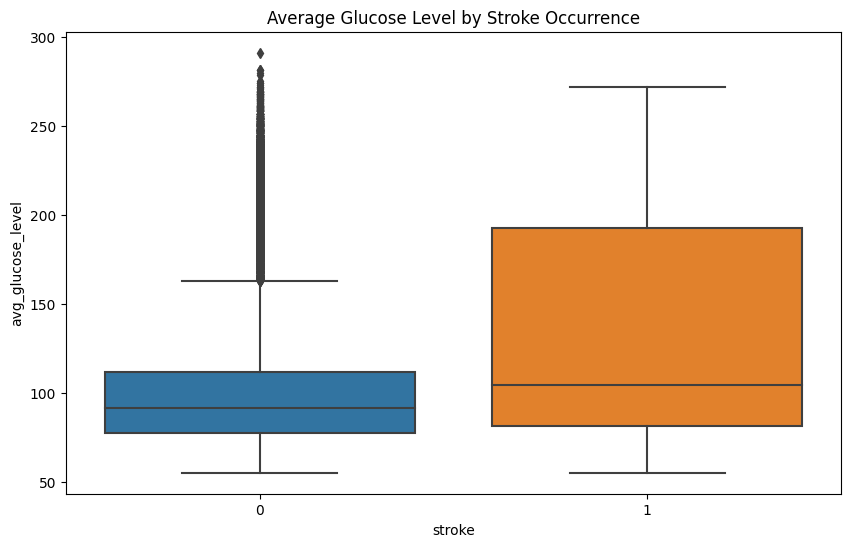

In [19]:
# Glucose Status and Stroke Relationship
plt.figure(figsize=(10,6))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title('Average Glucose Level by Stroke Occurrence')
plt.show()

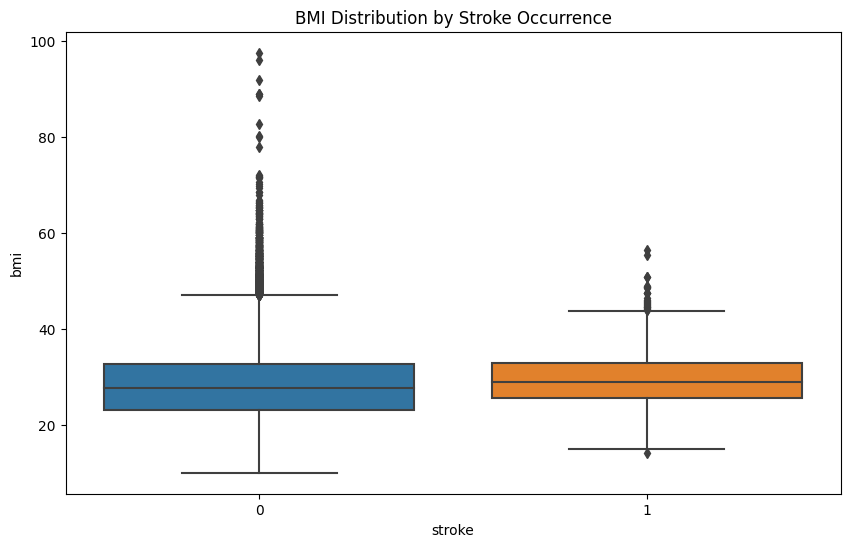

In [20]:
# BMI and Stroke Relationship
plt.figure(figsize=(10,6))
sns.boxplot(x='stroke', y='bmi', data=df)
plt.title('BMI Distribution by Stroke Occurrence')
plt.show()

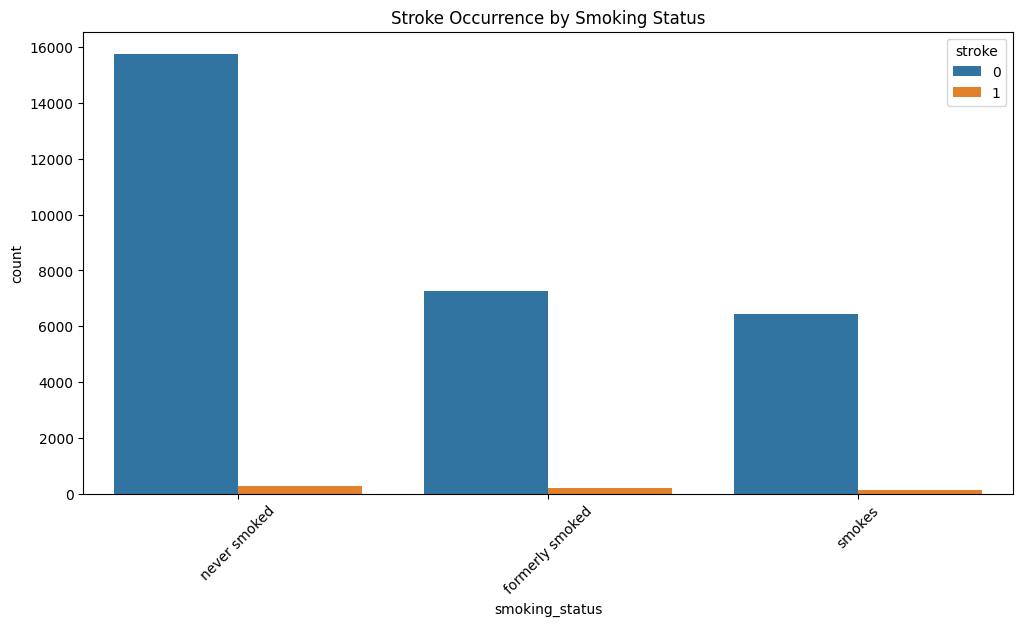

In [21]:
# Smoking Status and Stroke Relationship
plt.figure(figsize=(12,6))
sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title('Stroke Occurrence by Smoking Status')
plt.xticks(rotation=45)
plt.show()

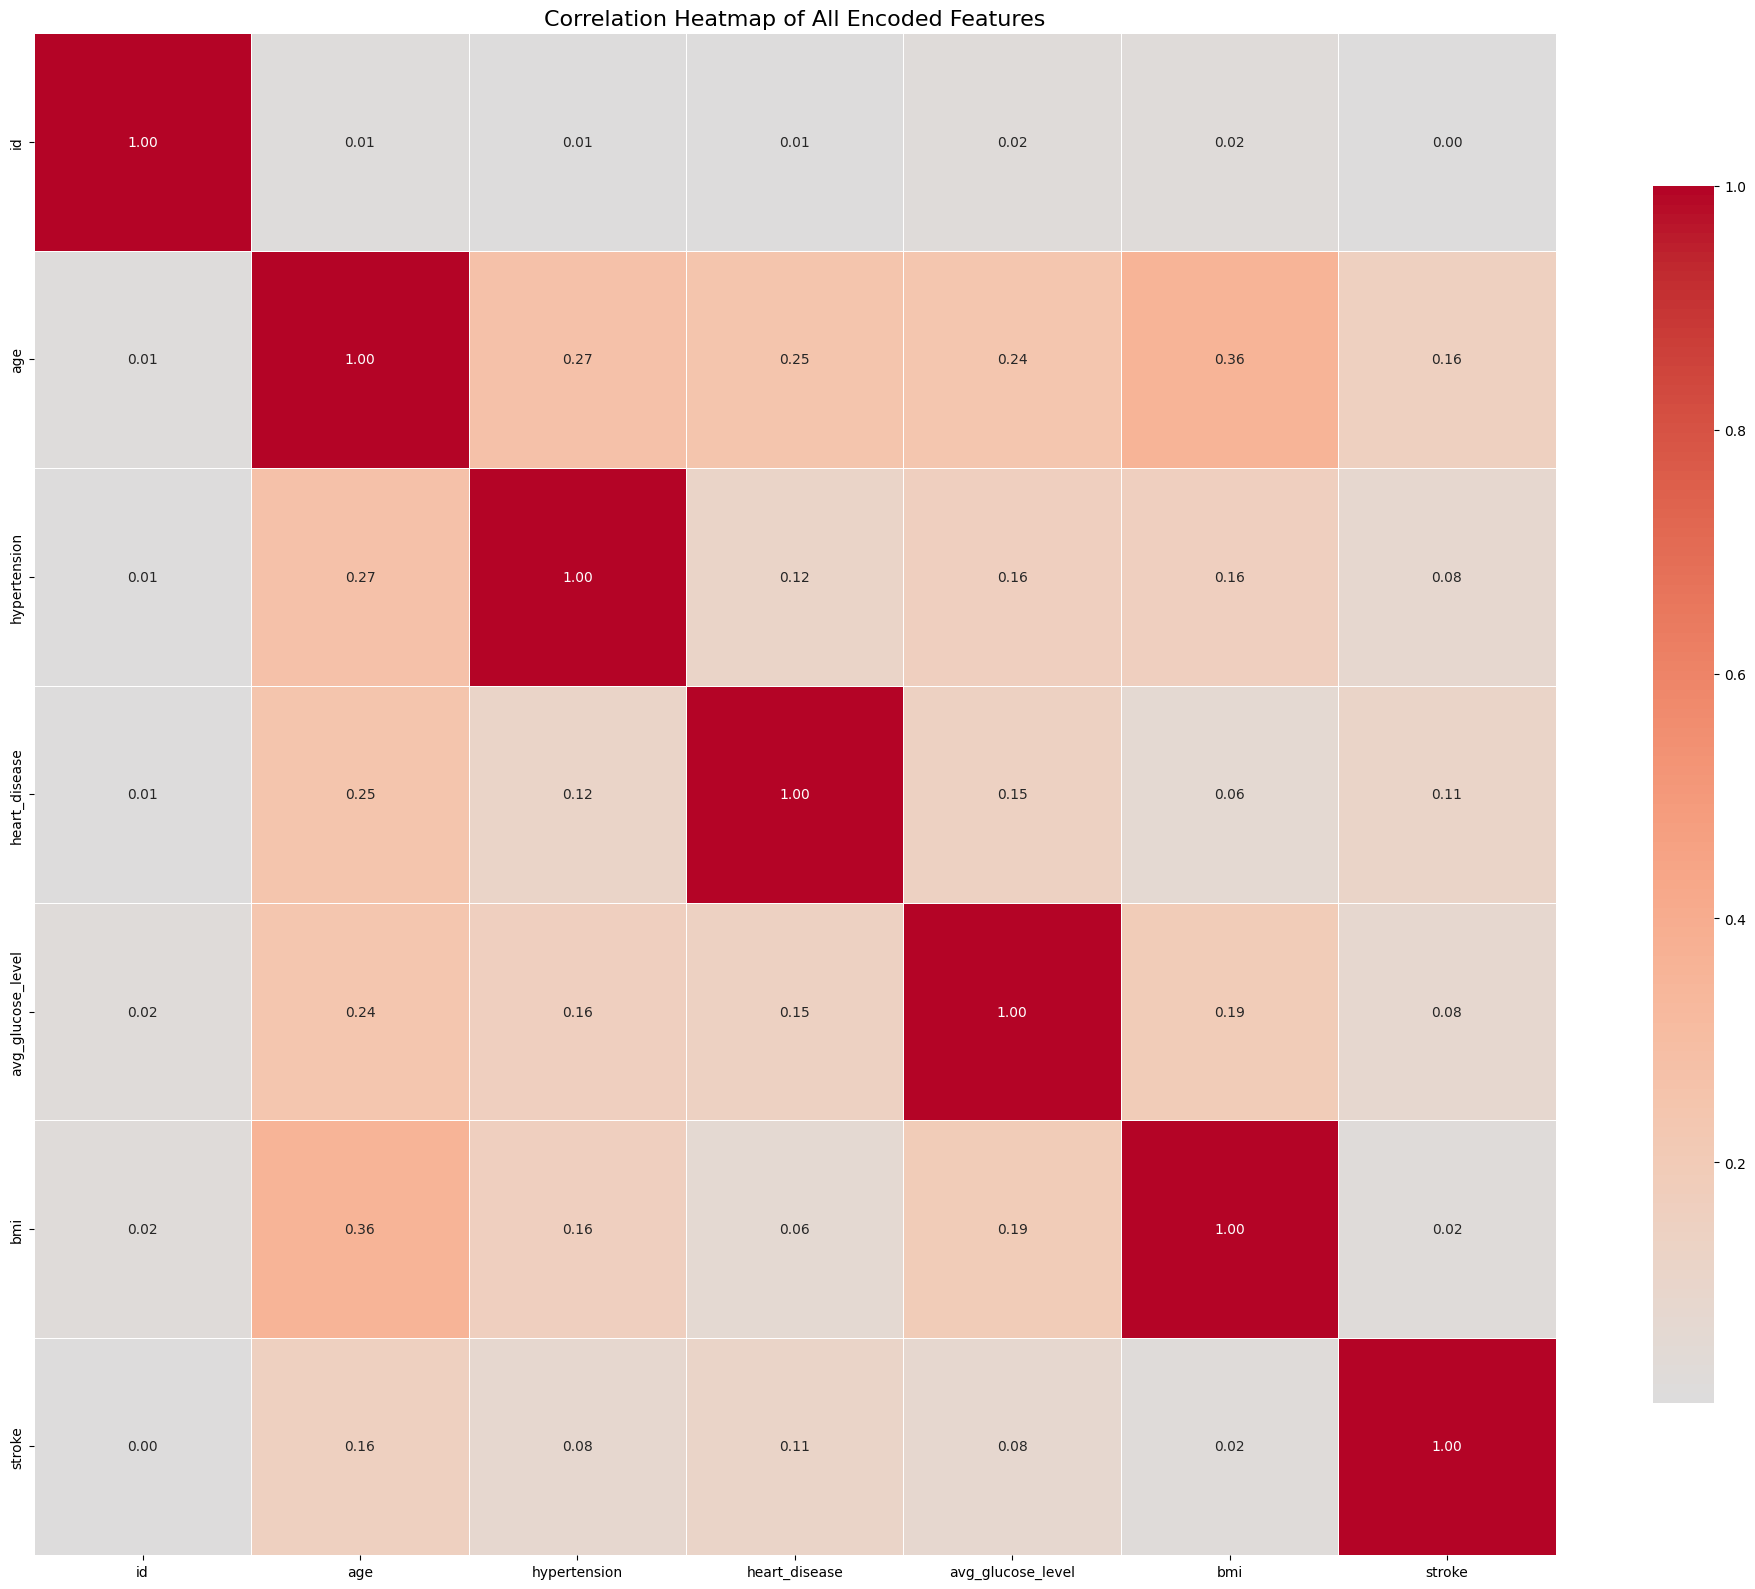

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data for correlation heatmap
# First, encode categorical columns
def encode_categorical(df):
    # Create a copy of the dataframe
    df_encoded = df.copy()
    
    # Encode categorical columns
    categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    
    for col in categorical_cols:
        # Use pandas get_dummies for one-hot encoding
        if col in df_encoded.columns:
            df_encoded = pd.get_dummies(df_encoded, columns=[col], prefix=col)
    
    return df_encoded

# Prepare the correlation heatmap
plt.figure(figsize=(20,16))
df_encoded = encode_categorical(df)

# Select numerical and encoded columns
correlation_columns = df_encoded.select_dtypes(include=['int64', 'float64', 'uint8']).columns
correlation_matrix = df_encoded[correlation_columns].corr()

# Create heatmap
sns.heatmap(correlation_matrix, 
            cmap='coolwarm',  # Blue-Red color palette
            center=0,          # Center color at 0
            annot=True,        # Show correlation values
            fmt='.2f',         # Format to 2 decimal places
            square=True,       # Make plot square
            linewidths=0.5,    # Add lines between cells
            cbar_kws={"shrink": .8})  # Slightly shrink the colorbar

plt.title('Correlation Heatmap of All Encoded Features', fontsize=16)
plt.tight_layout()
plt.show()

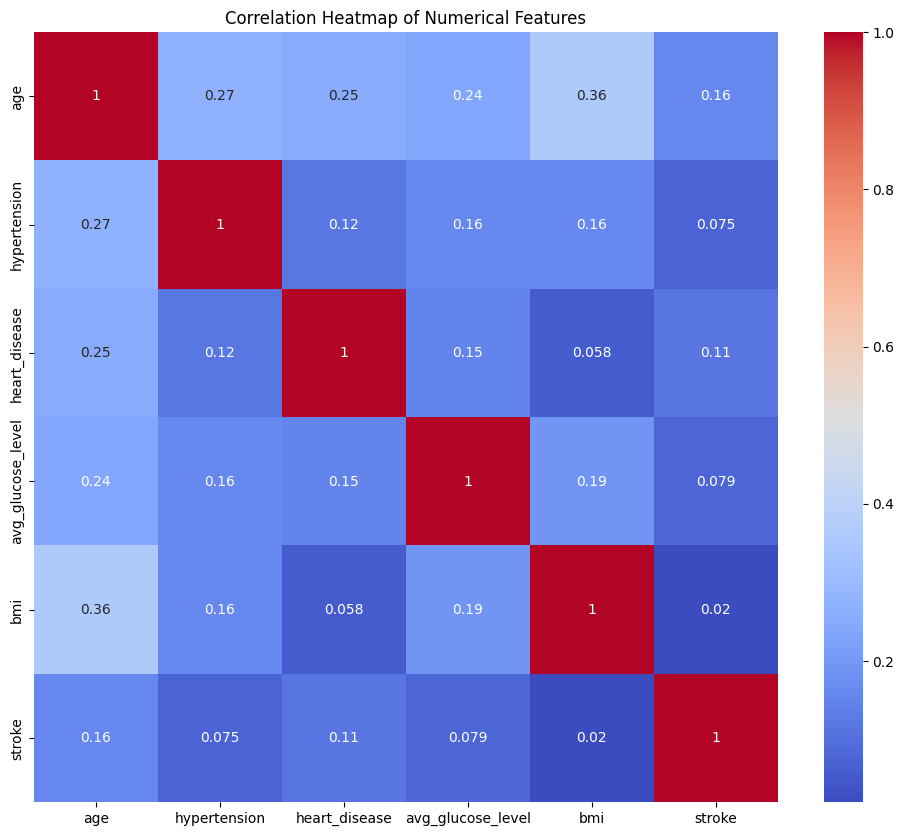

In [23]:
plt.figure(figsize=(12,10))
correlation_matrix = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Cleaning if you have missing values....

In [24]:
import numpy as np

# Check missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


In [25]:
df['bmi'].value_counts()

bmi
27.7    271
27.6    267
26.8    266
26.1    265
27.1    260
       ... 
59.1      1
64.0      1
56.1      1
56.9      1
89.0      1
Name: count, Length: 555, dtype: int64

In [26]:
df['smoking_status'].value_counts()

smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

In [30]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder

# Preprocessing
# Label Encode smoking status
le_smoking = LabelEncoder()
df['smoking_status_encoded'] = le_smoking.fit_transform(df['smoking_status'].fillna('Unknown'))


In [31]:
# Advanced Imputation for BMI
# Use IterativeImputer with contextual features
# Select features that might correlate with BMI
imputation_features = ['age', 'avg_glucose_level', 'hypertension', 'heart_disease', 'stroke', 'smoking_status_encoded']

# Prepare the data for imputation
imputation_data = df[imputation_features + ['bmi']].copy()

# Multiple Imputation
multi_imputer = IterativeImputer(
    estimator=ExtraTreesRegressor(n_estimators=100, random_state=42),
    max_iter=10,
    random_state=42
)


In [32]:
# Perform imputation
imputed_data = multi_imputer.fit_transform(imputation_data)

# Update BMI in the original dataframe
df['bmi'] = imputed_data[:, -1]

In [33]:
# Advanced Imputation for Smoking Status
# Option 1: Probabilistic Imputation based on other features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [34]:
# Create label encoders
le_gender = LabelEncoder()
le_smoking = LabelEncoder()

# Encode categorical variables
df['gender_encoded'] = le_gender.fit_transform(df['gender'])

In [35]:

# Advanced Imputation for Smoking Status
def predict_smoking_status(df):
    # Prepare dataset for prediction
    known_smoking = df[df['smoking_status'].notna()].copy()
    unknown_smoking = df[df['smoking_status'].isna()].copy()
    
    # Features for prediction
    features = ['age', 'gender_encoded', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
    
    # Prepare feature matrix and target
    X = known_smoking[features]
    y = known_smoking['smoking_status']
    
    # Split and train model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Predict for unknown smoking status
    unknown_features = unknown_smoking[features]
    predicted_smoking_status = rf_classifier.predict(unknown_features)
    
    # Fill missing values
    df.loc[df['smoking_status'].isna(), 'smoking_status'] = predicted_smoking_status
    
    return df, rf_classifier

In [36]:
# Apply smoking status prediction
df, smoking_model = predict_smoking_status(df)

In [37]:
# Verification
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
id                        0
gender                    0
age                       0
hypertension              0
heart_disease             0
ever_married              0
work_type                 0
Residence_type            0
avg_glucose_level         0
bmi                       0
smoking_status            0
stroke                    0
smoking_status_encoded    0
gender_encoded            0
dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'BMI Distribution After Imputation')

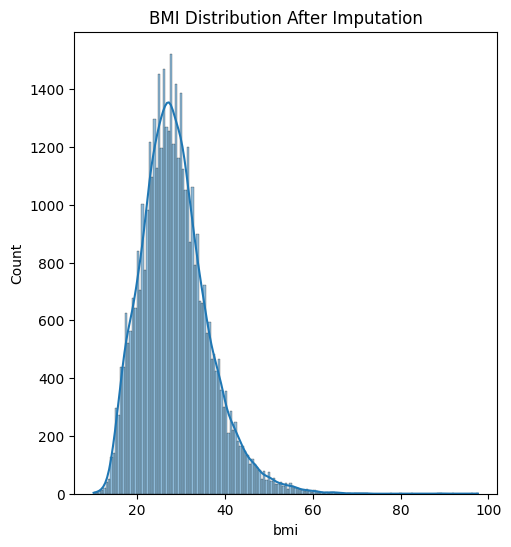

In [38]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# BMI Distribution After Imputation
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution After Imputation')

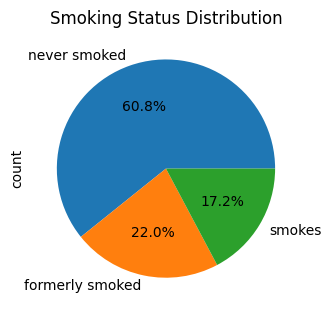

In [39]:
# Smoking Status Distribution
plt.subplot(1,2,2)
df['smoking_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Smoking Status Distribution')

plt.tight_layout()
plt.show()


### Feature selection 

In [43]:
# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_columns:
    df[f'{col}_encoded'] = le.fit_transform(df[col])


In [44]:
# Prepare feature matrix and target
features = [
    'age', 'gender_encoded', 'hypertension', 'heart_disease', 
    'ever_married_encoded', 'work_type_encoded', 
    'Residence_type_encoded', 'avg_glucose_level', 
    'bmi', 'smoking_status_encoded'
]

X = df[features]
y = df['stroke']

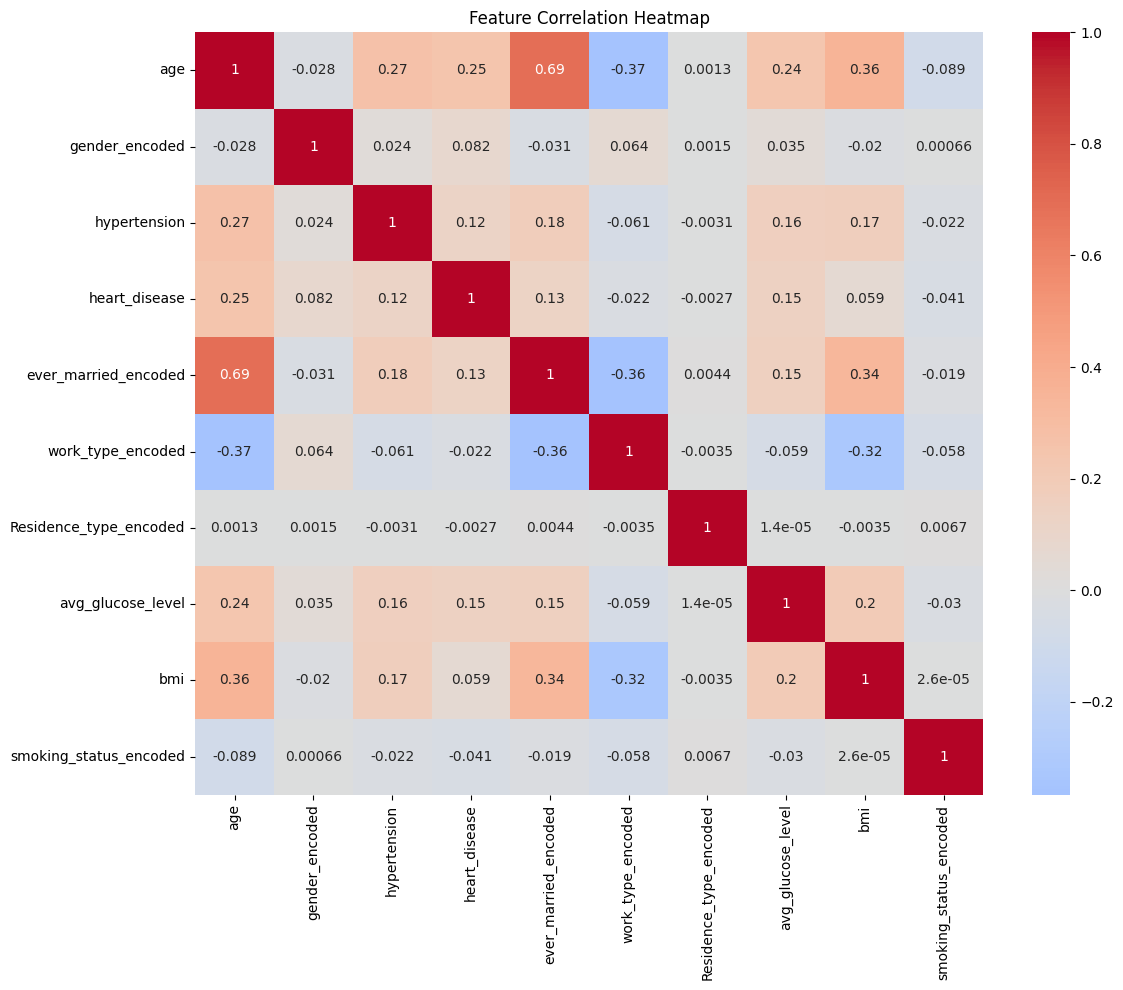

In [45]:
# 1. Correlation-based Feature Selection
plt.figure(figsize=(12,10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


In [46]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# 2. Mutual Information Feature Selection
selector_mi = SelectKBest(score_func=mutual_info_classif, k=5)
X_new_mi = selector_mi.fit_transform(X, y)

In [47]:
# Get selected feature indices
selected_features_mi = X.columns[selector_mi.get_support()].tolist()
print("\nTop Features by Mutual Information:")
for feature, score in zip(selected_features_mi, selector_mi.scores_):
    print(f"{feature}: {score}")
    
print


Top Features by Mutual Information:
age: 0.015305538043226208
ever_married_encoded: 0.004103532320494985
work_type_encoded: 0.0020408448544924074
Residence_type_encoded: 0.003540468029208821
smoking_status_encoded: 0.011951402208436379


<function print>

In [49]:
from sklearn.feature_selection import SelectFromModel

# 3. Random Forest Feature Importance
rf_selector = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42), 
    prefit=False, 
    max_features=5
)
rf_selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                max_features=5)

In [50]:
# Get feature importances
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_selector.estimator_.feature_importances_
}).sort_values('importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importances)


Random Forest Feature Importance:
                  feature  importance
7       avg_glucose_level    0.347203
8                     bmi    0.300819
0                     age    0.169567
9  smoking_status_encoded    0.040668
5       work_type_encoded    0.040633
6  Residence_type_encoded    0.028179
1          gender_encoded    0.027829
2            hypertension    0.018229
3           heart_disease    0.014874
4    ever_married_encoded    0.011999


In [51]:
# Get feature importances
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_selector.estimator_.feature_importances_
}).sort_values('importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importances)


Random Forest Feature Importance:
                  feature  importance
7       avg_glucose_level    0.347203
8                     bmi    0.300819
0                     age    0.169567
9  smoking_status_encoded    0.040668
5       work_type_encoded    0.040633
6  Residence_type_encoded    0.028179
1          gender_encoded    0.027829
2            hypertension    0.018229
3           heart_disease    0.014874
4    ever_married_encoded    0.011999


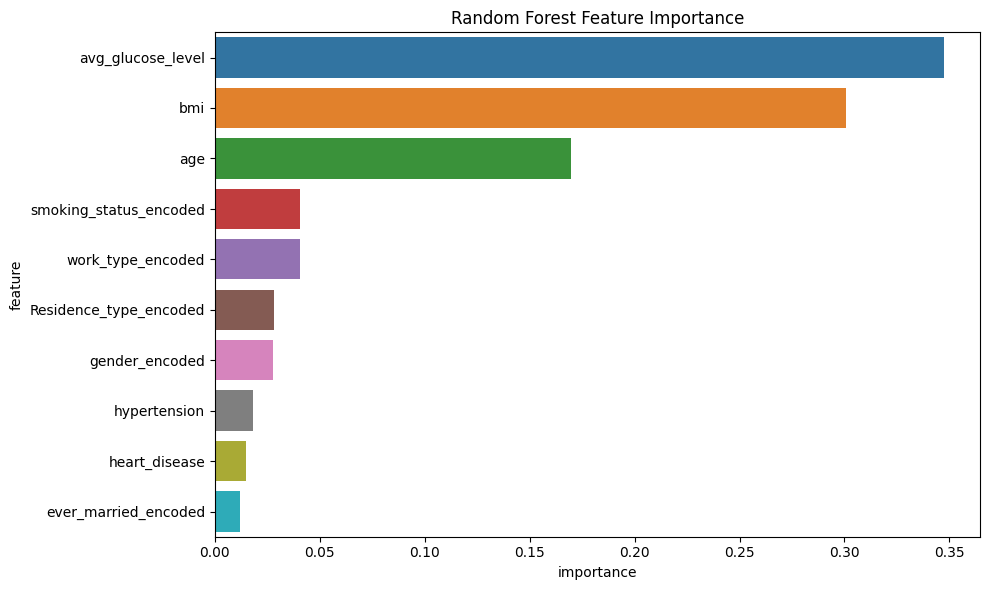

In [52]:
# Visualization of Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


In [53]:
# 4. Recursive Feature Elimination (Optional)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(
    estimator=LogisticRegression(), 
    n_features_to_select=5, 
    step=1
)
rfe_selector = rfe_selector.fit(X, y)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [54]:
# Get selected features
selected_features_rfe = X.columns[rfe_selector.support_].tolist()
print("\nFeatures Selected by RFE:")
print(selected_features_rfe)


Features Selected by RFE:
['age', 'gender_encoded', 'hypertension', 'heart_disease', 'smoking_status_encoded']


In [55]:
dataset = df[['age'] + ['hypertension'] + ['smoking_status_encoded'] +['heart_disease']+['bmi']+['avg_glucose_level'] + ['stroke']+['gender']]

In [56]:
dataset.head()

,age,hypertension,smoking_status_encoded,heart_disease,bmi,avg_glucose_level,stroke,gender
0,3.0,0,1,0,18.0,95.12,0,Male
1,58.0,1,1,0,39.2,87.96,0,Male
2,8.0,0,0,0,17.6,110.89,0,Female
3,70.0,0,0,0,35.9,69.04,0,Female
4,14.0,0,1,0,19.1,161.28,0,Male


In [57]:
dataset['stroke'].value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

In [58]:
dataset['gender_encoded'] = le.fit_transform(dataset['gender'])

/tmp/ipykernel_24/4008643886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['gender_encoded'] = le.fit_transform(dataset['gender'])


In [59]:
# Select features
features = [
    'age', 'gender_encoded', 'hypertension', 'heart_disease', 'avg_glucose_level', 
    'bmi', 'smoking_status_encoded'
]

X = dataset[features]
y = dataset['stroke']

In [60]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_balanced, y_balanced = smote_tomek.fit_resample(X, y)

# Check the new class distribution
print("Before balancing:")
print(y.value_counts())
print("\nAfter balancing:")
print(y_balanced.value_counts())


Before balancing:
stroke
0    42617
1      783
Name: count, dtype: int64

After balancing:
stroke
0    42463
1    42463
Name: count, dtype: int64


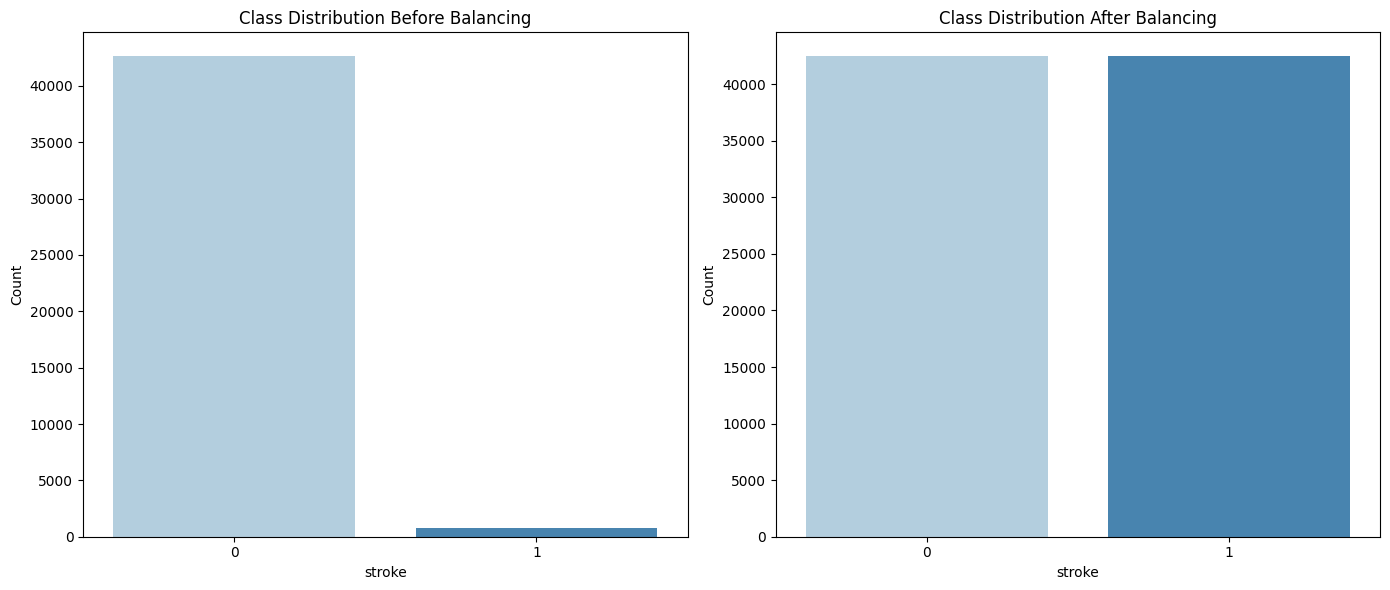

Before balancing:
stroke
0    42617
1      783
Name: count, dtype: int64

After balancing:
stroke
0    42463
1    42463
Name: count, dtype: int64


In [61]:
# Check the class distribution before and after balancing
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Before balancing
sns.countplot(x=y, ax=ax[0], palette='Blues')
ax[0].set_title('Class Distribution Before Balancing')
ax[0].set_ylabel('Count')

# After balancing
sns.countplot(x=y_balanced, ax=ax[1], palette='Blues')
ax[1].set_title('Class Distribution After Balancing')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Print the class distribution
print("Before balancing:")
print(y.value_counts())
print("\nAfter balancing:")
print(y_balanced.value_counts())

# evaluate model performance using covenable metrics!

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the balanced dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the balanced data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.9663
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     12759
           1       0.96      0.98      0.97     12719

    accuracy                           0.97     25478
   macro avg       0.97      0.97      0.97     25478
weighted avg       0.97      0.97      0.97     25478



In [63]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [64]:
# ROC Curve and AUC
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])

In [65]:
# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.9663
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     12759
           1       0.96      0.98      0.97     12719

    accuracy                           0.97     25478
   macro avg       0.97      0.97      0.97     25478
weighted avg       0.97      0.97      0.97     25478

Confusion Matrix:
[[12176   583]
 [  275 12444]]
ROC AUC: 0.9663


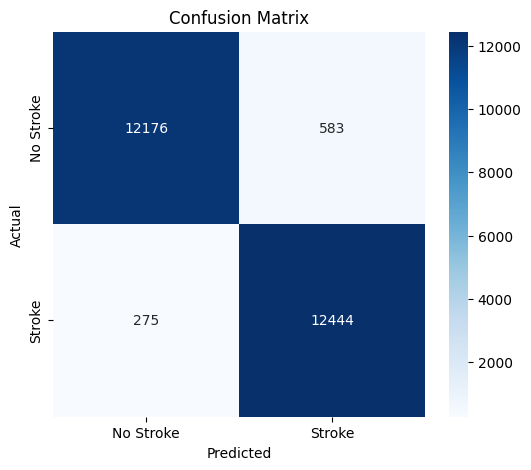

In [66]:
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



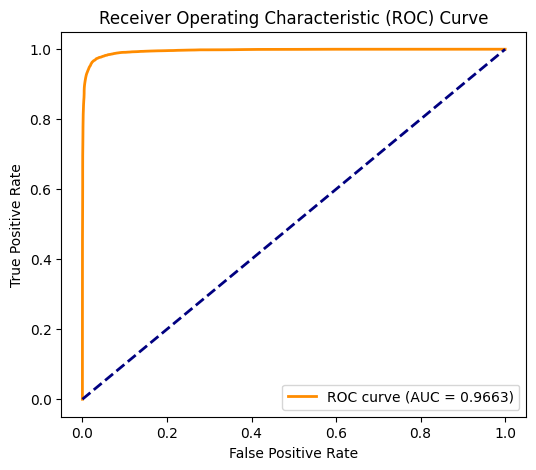

In [67]:
# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()